In [1]:
from yahoo_fin import options
import datetime
from datetime import datetime,date
from wallstreet import Call

import numpy as np
import sympy as sy
from scipy import log, exp, sqrt, stats
#import sy.statistics as systats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
SPX_Call = pd.read_csv(r'C:\Users\rohit\Desktop\Fintech Engineering\SPX_Options_Call.csv')
SPX_Call = SPX_Call.drop('Unnamed: 0', axis=1)
SPX_Call.head()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity
0,SPXW191213C01950000,2019-12-04 10:47AM EST,1950,1164.00,1183.6,1189.8,0.0,-,1,9,161.62%,2019-12-13,2019-12-10,3
1,SPXW191213C02000000,2019-11-27 1:20PM EST,2000,1149.91,1133.6,1139.8,0.0,-,-,10,153.61%,2019-12-13,2019-12-10,3
2,SPXW191213C02200000,2019-12-06 3:12PM EST,2200,946.48,933.7,939.8,0.0,-,1,1,125.20%,2019-12-13,2019-12-10,3
3,SPXW191213C02480000,2019-11-18 12:03AM EST,2480,612.58,653.8,659.9,0.0,-,-,10,88.33%,2019-12-13,2019-12-10,3
4,SPXW191213C02500000,2019-10-30 10:22AM EST,2500,530.52,639.9,644.8,0.0,-,1,1,124.18%,2019-12-13,2019-12-10,3


In [3]:
SPX_Call.tail()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity
2763,SPX211217C04100000,2019-12-04 2:29PM EST,4100,15.35,15.9,17.0,0.0,-,600,1381,12.28%,2021-12-17,2019-12-10,738
2764,SPX211217C04200000,2019-12-09 11:56AM EST,4200,12.47,11.8,12.7,0.0,-,4,3540,12.33%,2021-12-17,2019-12-10,738
2765,SPX211217C04300000,2019-11-27 2:52PM EST,4300,9.30,8.8,9.7,0.0,-,1,1907,12.44%,2021-12-17,2019-12-10,738
2766,SPX211217C04400000,2019-12-03 11:55AM EST,4400,6.33,6.8,7.5,0.0,-,3,54,12.58%,2021-12-17,2019-12-10,738
2767,SPX211217C04500000,2019-12-04 12:21PM EST,4500,5.40,5.3,6.0,0.0,-,1,2,12.77%,2021-12-17,2019-12-10,738


In [4]:
SPX_Call['Implied Volatility'] = SPX_Call['Implied Volatility'].map(lambda x : float(str(x).split('%')[0])/100)
SPX_Call.head()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity
0,SPXW191213C01950000,2019-12-04 10:47AM EST,1950,1164.00,1183.6,1189.8,0.0,-,1,9,1.6162,2019-12-13,2019-12-10,3
1,SPXW191213C02000000,2019-11-27 1:20PM EST,2000,1149.91,1133.6,1139.8,0.0,-,-,10,1.5361,2019-12-13,2019-12-10,3
2,SPXW191213C02200000,2019-12-06 3:12PM EST,2200,946.48,933.7,939.8,0.0,-,1,1,1.2520,2019-12-13,2019-12-10,3
3,SPXW191213C02480000,2019-11-18 12:03AM EST,2480,612.58,653.8,659.9,0.0,-,-,10,0.8833,2019-12-13,2019-12-10,3
4,SPXW191213C02500000,2019-10-30 10:22AM EST,2500,530.52,639.9,644.8,0.0,-,1,1,1.2418,2019-12-13,2019-12-10,3


In [5]:
def black_scholes_call(S, K, T, rf, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #rf: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (log(S / K) + (rf + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    #d2 = (np.log(S / K) + (rf - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    
    call = (S * stats.norm.cdf(d1) - K * exp(-rf * T) * stats.norm.cdf(d2))
    
    return call

In [6]:
black_scholes_call(50, 100, 1, 0.05, 0.2)

0.0023994175533097323

In [7]:
SPX_Call.Strike.to_list()

[1950,
 2000,
 2200,
 2480,
 2500,
 2525,
 2580,
 2630,
 2670,
 2700,
 2750,
 2760,
 2800,
 2810,
 2815,
 2820,
 2835,
 2840,
 2850,
 2860,
 2865,
 2875,
 2880,
 2890,
 2895,
 2900,
 2910,
 2915,
 2920,
 2925,
 2930,
 2935,
 2940,
 2945,
 2950,
 2955,
 2960,
 2965,
 2970,
 2975,
 2980,
 2985,
 2990,
 2995,
 3000,
 3005,
 3010,
 3015,
 3020,
 3025,
 3030,
 3035,
 3040,
 3045,
 3050,
 3055,
 3060,
 3065,
 3070,
 3075,
 3080,
 3085,
 3090,
 3095,
 3100,
 3105,
 3110,
 3115,
 3120,
 3125,
 3130,
 3135,
 3140,
 3145,
 3150,
 3155,
 3160,
 3165,
 3170,
 3175,
 3180,
 3185,
 3190,
 3195,
 3200,
 3205,
 3210,
 3215,
 3220,
 3225,
 3230,
 3235,
 3240,
 3245,
 3250,
 3255,
 3260,
 3265,
 3270,
 3275,
 3280,
 3285,
 3290,
 3295,
 3300,
 3305,
 3310,
 3320,
 3325,
 3330,
 3340,
 3350,
 3355,
 3375,
 3400,
 3425,
 3500,
 3600,
 2850,
 2870,
 2875,
 2900,
 2915,
 2920,
 2950,
 2995,
 3000,
 3005,
 3010,
 3015,
 3020,
 3025,
 3030,
 3035,
 3040,
 3045,
 3050,
 3055,
 3060,
 3065,
 3070,
 3075,
 3080,

In [8]:
S = 3135.96 #as on 12 Dec 2019
K = SPX_Call.Strike.to_list()
TM = SPX_Call['Time to Maturity'].to_list()
T = [x/365 for x in TM]
rf = 0.025 
sigma = SPX_Call['Implied Volatility'].to_list()

In [9]:
def black_scholes_call(S, K, T, rf, sigma):
    
    #S: Underlying Stock Price at t=0
    #K: strike price
    #T: time to maturity
    #rf: Risk free rate
    #sigma: volatility of underlying asset
    
    Call_Option_Prices = []
    N = len(K)
    for val in range(0,N):

        d1 = (log(S / K[val]) + (rf + 0.5 * sigma[val] ** 2) * T[val]) / (sigma[val] * sqrt(T[val]))
        #d2 = (np.log(S / K) + (rf - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma[val] *sqrt(T[val])

        call = (S * stats.norm.cdf(d1) - K[val] * exp(-rf * T[val]) * stats.norm.cdf(d2))
        Call_Option_Prices.append(call)

    return Call_Option_Prices

In [10]:
#Calculating Black Scholes Option Prices for all the Options for SPX - 
BS_Option_Price = black_scholes_call(S, K, T, rf, sigma)
SPX_Call['Black Scholes Price'] = BS_Option_Price


C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


In [11]:
SPX_Call

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity,Black Scholes Price
0,SPXW191213C01950000,2019-12-04 10:47AM EST,1950,1164.00,1183.6,1189.8,0.00,-,1,9,1.6162,2019-12-13,2019-12-10,3,1186.417488
1,SPXW191213C02000000,2019-11-27 1:20PM EST,2000,1149.91,1133.6,1139.8,0.00,-,-,10,1.5361,2019-12-13,2019-12-10,3,1136.428297
2,SPXW191213C02200000,2019-12-06 3:12PM EST,2200,946.48,933.7,939.8,0.00,-,1,1,1.2520,2019-12-13,2019-12-10,3,936.484713
3,SPXW191213C02480000,2019-11-18 12:03AM EST,2480,612.58,653.8,659.9,0.00,-,-,10,0.8833,2019-12-13,2019-12-10,3,656.577330
4,SPXW191213C02500000,2019-10-30 10:22AM EST,2500,530.52,639.9,644.8,0.00,-,1,1,1.2418,2019-12-13,2019-12-10,3,639.041046
5,SPXW191213C02525000,2019-12-06 9:54AM EST,2525,617.58,608.8,615.0,0.00,-,1,0,0.8320,2019-12-13,2019-12-10,3,611.603733
6,SPXW191213C02580000,2019-11-18 12:03AM EST,2580,513.08,553.8,560.0,0.00,-,-,10,0.7576,2019-12-13,2019-12-10,3,556.618075
7,SPXW191213C02630000,2019-11-27 10:22AM EST,2630,513.17,503.9,510.1,0.00,-,-,0,0.7058,2019-12-13,2019-12-10,3,506.663882
8,SPXW191213C02670000,2019-11-20 1:45PM EST,2670,424.42,464.9,469.2,0.00,-,4,219,0.6585,2019-12-13,2019-12-10,3,466.692884
9,SPXW191213C02700000,2019-12-06 9:50AM EST,2700,443.00,434.4,438.7,0.00,-,1,5,0.5254,2019-12-13,2019-12-10,3,436.545967


In [12]:
SPX_Call['Current Price'] = 3000

In [13]:
import scipy.stats as si
def delta_call(S, K, rf, sigma, T):
    N = len(K)
    Delta_values=[]
    for val in range(0,N):
        
        d1 = (log(S / K[val]) + (rf + 0.5 * sigma[val] ** 2) * T[val]) / (sigma[val] * sqrt(T[val]))
        delta = si.norm.cdf(d1)
        Delta_values.append(delta)
        
    
    
   
    return Delta_values

In [27]:
delta_call_values = delta_call(S, K, rf, sigma, T)
SPX_Call['Delta Values'] = delta_call_values


C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


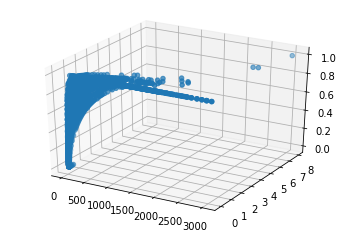

In [15]:
import sys
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = SPX_Call['Delta Values']
xline = SPX_Call['Black Scholes Price']
yline = SPX_Call['Implied Volatility']
ax.scatter3D(xline, yline, zline, 'red')
    
    
     
    

In [16]:
def Gamma_call(S, K, rf, sigma, T):
    N = len(K)
    Gamma_values=[]
    for val in range(0,N):
        d1 = (log(S / K[val]) + (rf + 0.5 * sigma[val] ** 2) * T[val]) / (sigma[val] * sqrt(T[val]))
    
        prob_density = si.norm.pdf(d1)
    
        gamma = prob_density / (S * sigma[val] * sqrt(T[val]))
    
        
        
       
        Gamma_values.append(gamma)
    return Gamma_values

In [17]:
gamma_call_values = Gamma_call(S, K, rf, sigma, T)
SPX_Call['Gamma Values'] = gamma_call_values
SPX_Call.head

C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


<bound method NDFrame.head of             Contract Name         Last Trade Date  Strike  Last Price     Bid  \
0     SPXW191213C01950000  2019-12-04 10:47AM EST    1950     1164.00  1183.6   
1     SPXW191213C02000000   2019-11-27 1:20PM EST    2000     1149.91  1133.6   
2     SPXW191213C02200000   2019-12-06 3:12PM EST    2200      946.48   933.7   
3     SPXW191213C02480000  2019-11-18 12:03AM EST    2480      612.58   653.8   
4     SPXW191213C02500000  2019-10-30 10:22AM EST    2500      530.52   639.9   
5     SPXW191213C02525000   2019-12-06 9:54AM EST    2525      617.58   608.8   
6     SPXW191213C02580000  2019-11-18 12:03AM EST    2580      513.08   553.8   
7     SPXW191213C02630000  2019-11-27 10:22AM EST    2630      513.17   503.9   
8     SPXW191213C02670000   2019-11-20 1:45PM EST    2670      424.42   464.9   
9     SPXW191213C02700000   2019-12-06 9:50AM EST    2700      443.00   434.4   
10    SPXW191213C02750000   2019-11-27 3:48PM EST    2750      402.04   385.7  

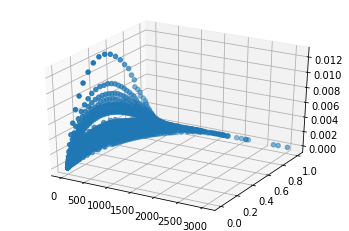

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = SPX_Call['Gamma Values']
xline = SPX_Call['Black Scholes Price']
yline = SPX_Call['Delta Values']
ax.scatter3D(xline, yline, zline, 'red')

In [21]:
def Theta_Call(S, K, rf, sigma, T):
    N = len(K)
    Theta_values=[]
    for val in range(0,N):
        
        d1 = (log(S / K[val]) + (rf + 0.5 * sigma[val] ** 2) * T[val]) / (sigma[val] * sqrt(T[val]))
        d2 = d1 - sigma[val]*sqrt(T[val])
        prob_density =si.norm.pdf(d1)
        theta_1 = (-sigma[val] * S * prob_density) 
        theta_2 = (2 * sqrt(T[val])) + rf * K[val] * exp(-rf * T[val]) * si.norm.cdf(-d2)
        theta = theta_1/theta_2
        Theta_values.append(theta)
    return Theta_values
        
        

In [22]:
theta_call_values = Theta_Call(S, K, rf, sigma, T)
SPX_Call['Theta Values'] = theta_call_values
SPX_Call.head()

C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity,Black Scholes Price,Current Price,Delta Values,Gamma Values,Theta Values
0,SPXW191213C01950000,2019-12-04 10:47AM EST,1950,1164.00,1183.6,1189.8,0.0,-,1,9,1.6162,2019-12-13,2019-12-10,3,1186.417488,3000,0.999545,0.000004,-37.769502
1,SPXW191213C02000000,2019-11-27 1:20PM EST,2000,1149.91,1133.6,1139.8,0.0,-,-,10,1.5361,2019-12-13,2019-12-10,3,1136.428297,3000,0.999518,0.000004,-37.515218
2,SPXW191213C02200000,2019-12-06 3:12PM EST,2200,946.48,933.7,939.8,0.0,-,1,1,1.2520,2019-12-13,2019-12-10,3,936.484713,3000,0.999268,0.000007,-41.270153
3,SPXW191213C02480000,2019-11-18 12:03AM EST,2480,612.58,653.8,659.9,0.0,-,-,10,0.8833,2019-12-13,2019-12-10,3,656.577330,3000,0.998526,0.000019,-44.402795
4,SPXW191213C02500000,2019-10-30 10:22AM EST,2500,530.52,639.9,644.8,0.0,-,1,1,1.2418,2019-12-13,2019-12-10,3,639.041046,3000,0.980834,0.000132,-104.029041


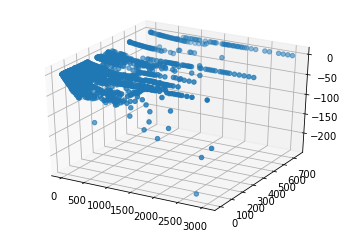

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = SPX_Call['Theta Values']
xline = SPX_Call['Black Scholes Price']
yline = SPX_Call['Time to Maturity']
ax.scatter3D(xline, yline, zline, 'red')

In [24]:
def Vega_Call(S, K, rf, sigma, T):
    N = len(K)
    Vega_values = []
    for val in range(0,N):
        d1 = (log(S / K[val]) + (rf + 0.5 * sigma[val] ** 2) * T[val]) / (sigma[val] * sqrt(T[val]))
        prob_density = stats.norm.pdf(d1)
        vega = prob_density * S * sqrt(T[val])
        Vega_values.append(vega)
    return vega

In [25]:
vega_call_values = Vega_Call(S, K, rf, sigma, T)
SPX_Call['Vega Values'] = vega_call_values
SPX_Call.head()

C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity,Black Scholes Price,Current Price,Delta Values,Gamma Values,Theta Values,Vega Values
0,SPXW191213C01950000,2019-12-04 10:47AM EST,1950,1164.00,1183.6,1189.8,0.0,-,1,9,1.6162,2019-12-13,2019-12-10,3,1186.417488,3000,0.999545,0.000004,-37.769502,479.173484
1,SPXW191213C02000000,2019-11-27 1:20PM EST,2000,1149.91,1133.6,1139.8,0.0,-,-,10,1.5361,2019-12-13,2019-12-10,3,1136.428297,3000,0.999518,0.000004,-37.515218,479.173484
2,SPXW191213C02200000,2019-12-06 3:12PM EST,2200,946.48,933.7,939.8,0.0,-,1,1,1.2520,2019-12-13,2019-12-10,3,936.484713,3000,0.999268,0.000007,-41.270153,479.173484
3,SPXW191213C02480000,2019-11-18 12:03AM EST,2480,612.58,653.8,659.9,0.0,-,-,10,0.8833,2019-12-13,2019-12-10,3,656.577330,3000,0.998526,0.000019,-44.402795,479.173484
4,SPXW191213C02500000,2019-10-30 10:22AM EST,2500,530.52,639.9,644.8,0.0,-,1,1,1.2418,2019-12-13,2019-12-10,3,639.041046,3000,0.980834,0.000132,-104.029041,479.173484


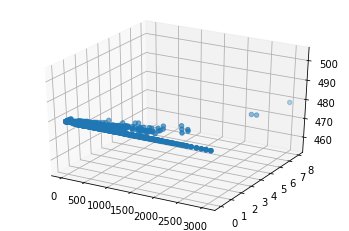

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = SPX_Call['Vega Values']
xline = SPX_Call['Black Scholes Price']
yline = SPX_Call['Implied Volatility']
ax.scatter3D(xline, yline, zline, 'red')